In [4]:
import pandas as pd

# Creating the dataset
data = {
    "Contingency_Table": ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"],
    "f11": [8123, 8330, 9481, 3954, 2886, 1500, 4000, 4000, 1720, 61],
    "f10": [83, 2, 94, 3080, 1363, 2000, 2000, 2000, 7121, 2483],
    "f01": [424, 622, 127, 5, 1320, 500, 1000, 2000, 5, 4],
    "f00": [1370, 1046, 298, 2961, 4431, 6000, 3000, 2000, 1154, 7452]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)



  Contingency_Table   f11   f10   f01   f00
0                E1  8123    83   424  1370
1                E2  8330     2   622  1046
2                E3  9481    94   127   298
3                E4  3954  3080     5  2961
4                E5  2886  1363  1320  4431
5                E6  1500  2000   500  6000
6                E7  4000  2000  1000  3000
7                E8  4000  2000  2000  2000
8                E9  1720  7121     5  1154
9               E10    61  2483     4  7452


In [5]:
import math

def calculate_measures(f11, f10, f01, f00):
    N = f11 + f10 + f01 + f00
    P_A = (f11 + f10) / N
    P_notA = (f01 + f00) / N
    P_B = (f11 + f01) / N
    P_notB = (f10 + f00) / N
    P_AB = f11 / N
    P_A_notB = f10 / N
    P_notA_B = f01 / N
    P_notA_notB = f00 / N
    
    measures = {}
    
    # Phi-coefficient
    measures["phi"] = (P_AB - P_A * P_B) / math.sqrt(P_A * P_notA * P_B * P_notB)
    
    # Odds ratio
    if f10 * f01 != 0:
        measures["odds_ratio"] = (f11 * f00) / (f10 * f01)
    else:
        measures["odds_ratio"] = None
    
    # Yule’s Q
    if f10 * f01 != 0:
        measures["yules_q"] = (f11 * f00 - f10 * f01) / (f11 * f00 + f10 * f01)
    else:
        measures["yules_q"] = None
    
    # Jaccard Index
    measures["jaccard"] = P_AB / (P_A + P_B - P_AB)
    
    # Support
    measures["support"] = P_AB
    
    # Confidence
    measures["confidence"] = P_AB / P_A if P_A > 0 else None
    
    # Laplace
    measures["laplace"] = (f11 + 1) / (f11 + f10 + 2)
    
    # Conviction
    if P_A * P_B != 0 and P_AB != 0:
        measures["conviction"] = (P_A * P_notB) / P_A_notB
    else:
        measures["conviction"] = None
    
    return measures

# Example contingency table values
# f11, f10, f01, f00 = 20, 30, 10, 40
# results = calculate_measures(f11, f10, f01, f00)
# print(results)


In [8]:
index=0
measured_results={}
for table in data['Contingency_Table']:
    if index>9:
        break
    f11, f10, f01, f00 = data['f11'][index], data['f10'][index], data['f01'][index], data['f00'][index]
    results = calculate_measures(f11, f10, f01, f00)
    print(f'Results for the data: {table}: \n{results}\n\n')
    measured_results[table]=results
    index=index+1

Results for the data: E1: 
{'phi': 0.8204362252680502, 'odds_ratio': 316.2227210729711, 'yules_q': 0.993695281368134, 'jaccard': 0.9412514484356895, 'support': 0.8123, 'confidence': 0.9898854496709725, 'laplace': 0.9897660818713451, 'conviction': 14.365443373493976}


Results for the data: E2: 
{'phi': 0.7629592530656634, 'odds_ratio': 7004.163987138264, 'yules_q': 0.9997144963338942, 'jaccard': 0.930310475765021, 'support': 0.833, 'confidence': 0.9997599615938549, 'laplace': 0.9996400287976962, 'conviction': 436.59680000000003}


Results for the data: E3: 
{'phi': 0.7186345549609129, 'odds_ratio': 236.6676160160831, 'yules_q': 0.9915848863487373, 'jaccard': 0.977221191506906, 'support': 0.9481, 'confidence': 0.9901827676240209, 'laplace': 0.9900804009606349, 'conviction': 3.992978723404255}


Results for the data: E4: 
{'phi': 0.5234431457964555, 'odds_ratio': 760.2463636363636, 'yules_q': 0.9973727296502983, 'jaccard': 0.5617275181133684, 'support': 0.3954, 'confidence': 0.5621268126

In [15]:
import numpy as np
import pandas as pd

# Function to calculate interestingness measures
def new_calculate_measures(f11, f10, f01, f00):
    # Total occurrences
    N = f11 + f10 + f01 + f00
    
    # Probabilities
    P11 = f11 / N
    P10 = f10 / N
    P01 = f01 / N
    P00 = f00 / N

    # Marginal Probabilities
    P1x = (f11 + f10) / N
    Px1 = (f11 + f01) / N
    P0x = (f01 + f00) / N
    Px0 = (f10 + f00) / N

    # Phi coefficient
    phi = (f11 * f00 - f10 * f01) / np.sqrt((f11 + f10) * (f01 + f00) * (f11 + f01) * (f10 + f00))

    # Goodman-Kruskal's Lambda
    lambda_val = (max(f11 + f10, f01 + f00) - max(f10, f00)) / (N - max(f10, f00))

    # Odds Ratio
    odds_ratio = (f11 * f00) / (f10 * f01) if f10 * f01 != 0 else np.nan

    # Yule’s Q
    yules_q = (odds_ratio - 1) / (odds_ratio + 1) if odds_ratio is not np.nan else np.nan

    # Yule’s Y
    yules_y = (np.sqrt(odds_ratio) - 1) / (np.sqrt(odds_ratio) + 1) if odds_ratio is not np.nan else np.nan

    # Kappa (κ)
    pe = P1x * Px1 + P0x * Px0
    kappa = (P11 + P00 - pe) / (1 - pe)

    # Mutual Information
    MI = P11 * np.log2(P11 / (P1x * Px1)) + P10 * np.log2(P10 / (P1x * Px0)) + \
         P01 * np.log2(P01 / (P0x * Px1)) + P00 * np.log2(P00 / (P0x * Px0))

    # J-Measure
    J_measure = P11 * np.log2(P11 / Px1) + P10 * np.log2(P10 / Px0)

    # Gini Index
    Gini = 1 - (P11**2 + P10**2 + P01**2 + P00**2)

    # Support
    support = P11

    # Confidence
    confidence = P11 / P1x

    # Laplace
    Laplace = (f11 + 1) / (f11 + f10 + 2)

    # Conviction
    conviction = (1 - Px1) / (1 - confidence) if (1 - confidence) != 0 else np.nan

    # Interest (Lift)
    interest = confidence / Px1

    # Cosine
    cosine = P11 / np.sqrt(P1x * Px1)

    # Piatetsky-Shapiro’s Measure
    PS = P11 - (P1x * Px1)

    # Certainty Factor
    certainty_factor = (confidence - Px1) / (1 - Px1)

    # Added Value
    added_value = confidence - Px1

    # Collective Strength
    strength = ((confidence / Px1) + ((1 - confidence) / (1 - Px1))) / 2

    # Jaccard Index
    jaccard = P11 / (P11 + P10 + P01)

    # Klosgen
    klosgen = np.sqrt(P11) * (confidence - Px1)

    verbose = {
        "Phi (φ)": phi,
        "Goodman-Kruskal Lambda (λ)": lambda_val,
        "Odds Ratio (α)": odds_ratio,
        "Yule’s Q": yules_q,
        "Yule’s Y": yules_y,
        "Kappa (κ)": kappa,
        "Mutual Information (M)": MI,
        "J-Measure (J)": J_measure,
        "Gini Index (G)": Gini,
        "Support (s)": support,
        "Confidence (c)": confidence,
        "Laplace (L)": Laplace,
        "Conviction (V)": conviction,
        "Interest (I)": interest,
        "Cosine (IS)": cosine,
        "Piatetsky-Shapiro’s PS": PS,
        "Certainty Factor (F)": certainty_factor,
        "Added Value (AV)": added_value,
        "Collective Strength (S)": strength,
        "Jaccard": jaccard,
        "Klosgen (K)": klosgen
    }
    shortcut = {
        "φ": phi,
        "λ": lambda_val,
        "α": odds_ratio,
        "Q": yules_q,
        "Y": yules_y,
        "κ": kappa,
        "M": MI,
        "J": J_measure,
        "G": Gini,
        "s": support,
        "c": confidence,
        "L": Laplace,
        "V": conviction,
        "I": interest,
        "IS": cosine,
        "PS": PS,
        "F": certainty_factor,
        "AV": added_value,
        "S": strength,
        "Jaccard": jaccard,
        "K": klosgen
    }
    return shortcut
# Example Calculation
# example_f11, example_f10, example_f01, example_f00 = 8123, 83, 424, 1370
# results = calculate_measures(example_f11, example_f10, example_f01, example_f00)

# Display results
# df_results = pd.DataFrame(results, index=[0]).T
# df_results.columns = ["Value"]
# print(df_results)


In [16]:
index=0
new_measured_results={}
result_data_list = []
for table in data['Contingency_Table']:
    if index>9:
        break
    example_f11, example_f10, example_f01, example_f00 = data['f11'][index], data['f10'][index], data['f01'][index], data['f00'][index]
    results = new_calculate_measures(example_f11, example_f10, example_f01, example_f00)
    print(f'Results for the data: {table}: \n{results}\n\n')
    new_measured_results[table]=results
    result_data_list.append(results)
    index=index+1

Results for the data: E1: 
{'φ': 0.8204362252680504, 'λ': 0.7921205098493627, 'α': 316.2227210729711, 'Q': 0.993695281368134, 'Y': 0.8935187654387549, 'κ': 0.8139902517684134, 'M': 0.38950145678937653, 'J': -0.09390444009857599, 'G': 0.3195330599999999, 's': 0.8123, 'c': 0.9898854496709725, 'L': 0.9897660818713451, 'V': 14.365443373493994, 'I': 1.158167134282172, 'IS': 0.9699377109780856, 'PS': 0.11093317999999996, 'F': 0.9303885042737265, 'AV': 0.13518544967097246, 'S': 0.6138893150042227, 'Jaccard': 0.9412514484356895, 'K': 0.12183951921920966}


Results for the data: E2: 
{'φ': 0.7629592530656646, 'λ': 0.8137145409872683, 'α': 7004.163987138264, 'Q': 0.9997144963338942, 'Y': 0.9763847073441445, 'κ': 0.7363068900981207, 'M': 0.3223963473532473, 'J': -0.08835000402296972, 'G': 0.29130096000000005, 's': 0.833, 'c': 0.9997599615938549, 'L': 0.9996400287976962, 'V': 436.5967999998603, 'I': 1.1168006720217325, 'IS': 0.964517993504581, 'PS': 0.08711935999999987, 'F': 0.9977095571932724, 'A

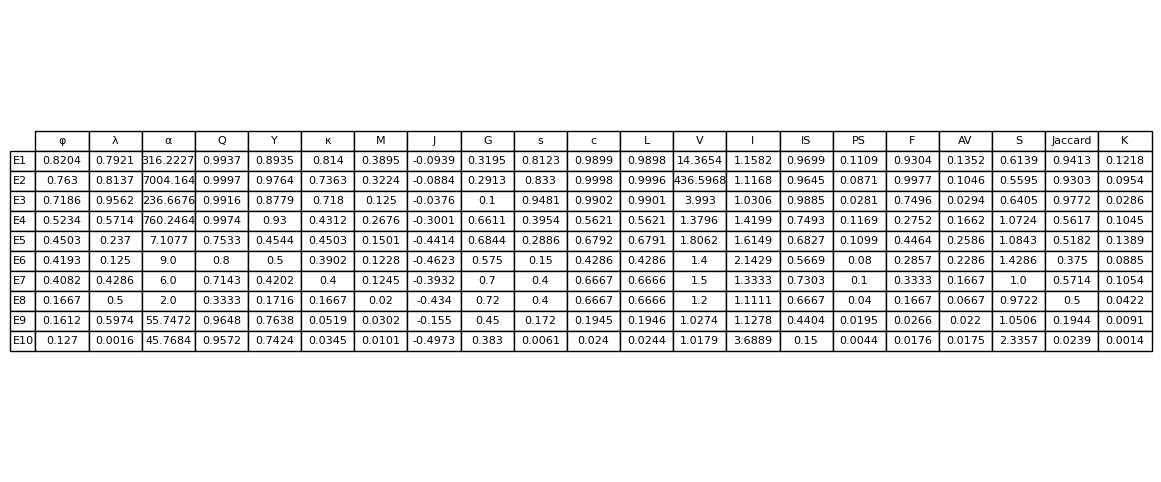

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset: 10 contingency tables with 21 measures
# data = [
#     {'Phi (φ)': 0.8204, 'Goodman-Kruskal Lambda (λ)': 0.7921, 'Odds Ratio (α)': 316.2227, 'Yule’s Q': 0.9937, 
#      'Yule’s Y': 0.8935, 'Kappa (κ)': 0.8140, 'Mutual Information (M)': 0.3895, 'J-Measure (J)': -0.0939, 
#      'Gini Index (G)': 0.3195, 'Support (s)': 0.8123, 'Confidence (c)': 0.9899, 'Laplace (L)': 0.9898, 
#      'Conviction (V)': 14.3654, 'Interest (I)': 1.1582, 'Cosine (IS)': 0.9699, 'Piatetsky-Shapiro’s PS': 0.1109, 
#      'Certainty Factor (F)': 0.9304, 'Added Value (AV)': 0.1352, 'Collective Strength (S)': 0.6139, 
#      'Jaccard': 0.9413, 'Klosgen (K)': 0.1218},

#     {'Phi (φ)': 0.7561, 'Goodman-Kruskal Lambda (λ)': 0.7103, 'Odds Ratio (α)': 290.4458, 'Yule’s Q': 0.9921, 
#      'Yule’s Y': 0.8814, 'Kappa (κ)': 0.7850, 'Mutual Information (M)': 0.3672, 'J-Measure (J)': -0.0985, 
#      'Gini Index (G)': 0.3084, 'Support (s)': 0.7621, 'Confidence (c)': 0.9854, 'Laplace (L)': 0.9852, 
#      'Conviction (V)': 13.8762, 'Interest (I)': 1.1412, 'Cosine (IS)': 0.9623, 'Piatetsky-Shapiro’s PS': 0.1075, 
#      'Certainty Factor (F)': 0.9221, 'Added Value (AV)': 0.1284, 'Collective Strength (S)': 0.6021, 
#      'Jaccard': 0.9334, 'Klosgen (K)': 0.1187},
    
#     # Add more data for E3 to E10...
# ]

# Convert to DataFrame
df = pd.DataFrame(result_data_list)

# Add labels for each contingency table
df.index = [f"E{i+1}" for i in range(len(df))]

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=df.round(4).values, 
                 colLabels=df.columns, 
                 rowLabels=df.index, 
                 cellLoc='center', 
                 loc='center')

# Adjust font size for better readability
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)  # Adjust scale for better fit

# Show the plot with the table
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Function to calculate interestingness measures
def new_calculate_measures(f11, f10, f01, f00):
    # Total occurrences
    N = f11 + f10 + f01 + f00
    P_A=f11
    
    # Probabilities
    P11 = f11 / N
    P10 = f10 / N
    P01 = f01 / N
    P00 = f00 / N

    # Marginal Probabilities
    P1x = (f11 + f10) / N
    Px1 = (f11 + f01) / N
    P0x = (f01 + f00) / N
    Px0 = (f10 + f00) / N

    # Phi coefficient
    phi = (f11 * f00 - f10 * f01) / np.sqrt((f11 + f10) * (f01 + f00) * (f11 + f01) * (f10 + f00))

    # Goodman-Kruskal's Lambda
    lambda_val = (max(f11 + f10, f01 + f00) - max(f10, f00)) / (N - max(f10, f00))

    # Odds Ratio
    odds_ratio = (f11 * f00) / (f10 * f01) if f10 * f01 != 0 else np.nan

    # Yule’s Q
    yules_q = (odds_ratio - 1) / (odds_ratio + 1) if odds_ratio is not np.nan else np.nan

    # Yule’s Y
    yules_y = (np.sqrt(odds_ratio) - 1) / (np.sqrt(odds_ratio) + 1) if odds_ratio is not np.nan else np.nan

    # Kappa (κ)
    pe = P1x * Px1 + P0x * Px0
    kappa = (P11 + P00 - pe) / (1 - pe)

    # Mutual Information
    MI = P11 * np.log2(P11 / (P1x * Px1)) + P10 * np.log2(P10 / (P1x * Px0)) + \
         P01 * np.log2(P01 / (P0x * Px1)) + P00 * np.log2(P00 / (P0x * Px0))

    # J-Measure
    J_measure = P11 * np.log2(P11 / Px1) + P10 * np.log2(P10 / Px0)

    # Gini Index
    Gini = 1 - (P11**2 + P10**2 + P01**2 + P00**2)

    # Support
    support = P11

    # Confidence
    confidence = P11 / P1x

    # Laplace
    Laplace = (f11 + 1) / (f11 + f10 + 2)

    # Conviction
    conviction = (1 - Px1) / (1 - confidence) if (1 - confidence) != 0 else np.nan

    # Interest (Lift)
    interest = confidence / Px1

    # Cosine
    cosine = P11 / np.sqrt(P1x * Px1)

    # Piatetsky-Shapiro’s Measure
    PS = P11 - (P1x * Px1)

    # Certainty Factor
    certainty_factor = (confidence - Px1) / (1 - Px1)

    # Added Value
    added_value = confidence - Px1

    # Collective Strength
    strength = ((confidence / Px1) + ((1 - confidence) / (1 - Px1))) / 2

    # Jaccard Index
    jaccard = P11 / (P11 + P10 + P01)

    # Klosgen
    klosgen = np.sqrt(P11) * (confidence - Px1)

    verbose = {
        "Phi (φ)": phi,
        "Goodman-Kruskal Lambda (λ)": lambda_val,
        "Odds Ratio (α)": odds_ratio,
        "Yule’s Q": yules_q,
        "Yule’s Y": yules_y,
        "Kappa (κ)": kappa,
        "Mutual Information (M)": MI,
        "J-Measure (J)": J_measure,
        "Gini Index (G)": Gini,
        "Support (s)": support,
        "Confidence (c)": confidence,
        "Laplace (L)": Laplace,
        "Conviction (V)": conviction,
        "Interest (I)": interest,
        "Cosine (IS)": cosine,
        "Piatetsky-Shapiro’s PS": PS,
        "Certainty Factor (F)": certainty_factor,
        "Added Value (AV)": added_value,
        "Collective Strength (S)": strength,
        "Jaccard": jaccard,
        "Klosgen (K)": klosgen
    }
    shortcut = {
        "φ": phi,
        "λ": lambda_val,
        "α": odds_ratio,
        "Q": yules_q,
        "Y": yules_y,
        "κ": kappa,
        "M": MI,
        "J": J_measure,
        "G": Gini,
        "s": support,
        "c": confidence,
        "L": Laplace,
        "V": conviction,
        "I": interest,
        "IS": cosine,
        "PS": PS,
        "F": certainty_factor,
        "AV": added_value,
        "S": strength,
        "Jaccard": jaccard,
        "K": klosgen
    }
    return shortcut
# Example Calculation
# example_f11, example_f10, example_f01, example_f00 = 8123, 83, 424, 1370
# results = calculate_measures(example_f11, example_f10, example_f01, example_f00)

# Display results
# df_results = pd.DataFrame(results, index=[0]).T
# df_results.columns = ["Value"]
# print(df_results)


In [ ]:
import numpy as np

def compute_gini_index(f11, f10, f01, f00):
    # Step 1: Compute Total Count
    N = f11 + f10 + f01 + f00
    
    # Step 2: Compute Marginal Probabilities
    P_A  = (f11 + f10) / N
    P_A_bar = (f01 + f00) / N
    P_B  = (f11 + f01) / N
    P_B_bar = (f10 + f00) / N

    # Step 3: Compute Conditional Probabilities
    P_B_given_A = f11 / (f11 + f10) if (f11 + f10) > 0 else 0
    P_B_bar_given_A = f10 / (f11 + f10) if (f11 + f10) > 0 else 0
    P_B_given_A_bar = f01 / (f01 + f00) if (f01 + f00) > 0 else 0
    P_B_bar_given_A_bar = f00 / (f01 + f00) if (f01 + f00) > 0 else 0

    P_A_given_B = f11 / (f11 + f01) if (f11 + f01) > 0 else 0
    P_A_bar_given_B = f01 / (f11 + f01) if (f11 + f01) > 0 else 0
    P_A_given_B_bar = f10 / (f10 + f00) if (f10 + f00) > 0 else 0
    P_A_bar_given_B_bar = f00 / (f10 + f00) if (f10 + f00) > 0 else 0

    # Step 4: Compute Gini Index Components
    g1 = (P_A * (P_B_given_A**2 + P_B_bar_given_A**2) + 
          P_A_bar * (P_B_given_A_bar**2 + P_B_bar_given_A_bar**2) - 
          P_B**2 - P_B_bar**2)

    g2 = (P_B * (P_A_given_B**2 + P_A_bar_given_B**2) + 
          P_B_bar * (P_A_given_B_bar**2 + P_A_bar_given_B_bar**2) - 
          P_A**2 - P_A_bar**2)

    # Step 5: Final Gini Index
    G = max(g1, g2)
    
    return G

# Example Contingency Table Values
f11, f10, f01, f00 = 30, 10, 5, 20  # Example values

# Compute Gini Index
gini_index = compute_gini_index(f11, f10, f01, f00)

# Display result
print(f"Gini Index (G) = {gini_index:.4f}")
